# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 590
['oranjemund', 'sao francisco', 'longyearbyen', 'port alfred', 'lazaro cardenas', 'olonkinbyen', 'margaret river', 'enewetak', 'bac lieu', 'chonchi', 'lata', 'adamstown', 'panino', 'ciudad insurgentes', 'taiohae', 'invercargill', 'nouadhibou', 'gaiman', 'geraldton', 'port elizabeth', 'hawaiian paradise park', 'port lincoln', 'santa lucia', 'tanout', 'port-aux-francais', 'arraial do cabo', 'andergrove', 'yellowknife', 'tiksi', 'kailua-kona', 'grytviken', 'tosontsengel', 'klyuchi', 'puerto natales', 'edinburgh of the seven seas', 'longavi', 'luderitz', 'iskateley', 'hotan', 'puerto deseado', 'ilulissat', 'avarua', 'qusmuryn', 'udachny', 'constitucion', 'bilibino', 'stanley', 'college', 'haiku-pauwela', 'eraan', 'bethel', 'dashiqiao', 'misratah', 'waitangi', 'sitka', 'hilo', 'petropavlovsk-kamchatsky', 'simanggang', 'badger', 'bardai', 'isafjordur', 'mar del plata', 'khovd', 'saipan', 'zaozersk', 'senador jose porfirio', 'tura', 'west island', "dul'durga"

In [4]:
print(f"Number of cities in the list: {len(cities)}")

print(cities)

Number of cities in the list: 590
['oranjemund', 'sao francisco', 'longyearbyen', 'port alfred', 'lazaro cardenas', 'olonkinbyen', 'margaret river', 'enewetak', 'bac lieu', 'chonchi', 'lata', 'adamstown', 'panino', 'ciudad insurgentes', 'taiohae', 'invercargill', 'nouadhibou', 'gaiman', 'geraldton', 'port elizabeth', 'hawaiian paradise park', 'port lincoln', 'santa lucia', 'tanout', 'port-aux-francais', 'arraial do cabo', 'andergrove', 'yellowknife', 'tiksi', 'kailua-kona', 'grytviken', 'tosontsengel', 'klyuchi', 'puerto natales', 'edinburgh of the seven seas', 'longavi', 'luderitz', 'iskateley', 'hotan', 'puerto deseado', 'ilulissat', 'avarua', 'qusmuryn', 'udachny', 'constitucion', 'bilibino', 'stanley', 'college', 'haiku-pauwela', 'eraan', 'bethel', 'dashiqiao', 'misratah', 'waitangi', 'sitka', 'hilo', 'petropavlovsk-kamchatsky', 'simanggang', 'badger', 'bardai', 'isafjordur', 'mar del plata', 'khovd', 'saipan', 'zaozersk', 'senador jose porfirio', 'tura', 'west island', "dul'durga"

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
units = 'metric'
# url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

    # Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


    # Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"

        
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()       

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

            # Log the url, record, and set numbers
        print(f"Found Record {i} | {city}")

        # If an error is experienced, skip the city
    except:
        print(f"Skipping...{city} not found.")
        pass
                
    # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Found Record 0 | oranjemund
Found Record 1 | sao francisco
Found Record 2 | longyearbyen
Found Record 3 | port alfred
Found Record 4 | lazaro cardenas
Found Record 5 | olonkinbyen
Found Record 6 | margaret river
Found Record 7 | enewetak
Found Record 8 | bac lieu
Found Record 9 | chonchi
Found Record 10 | lata
Found Record 11 | adamstown
Found Record 12 | panino
Found Record 13 | ciudad insurgentes
Skipping...taiohae not found.
Found Record 15 | invercargill
Found Record 16 | nouadhibou
Found Record 17 | gaiman
Found Record 18 | geraldton
Found Record 19 | port elizabeth
Found Record 20 | hawaiian paradise park
Found Record 21 | port lincoln
Found Record 22 | santa lucia
Found Record 23 | tanout
Found Record 24 | port-aux-francais
Found Record 25 | arraial do cabo
Found Record 26 | andergrove
Found Record 27 | yellowknife
Found Record 28 | tiksi
Found Record 29 | kailua-kona
Found Record 30 | grytviken
Found Record 31 | tosont

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,oranjemund,-28.5500,16.4333,17.23,74,100,4.73,NA,1697029565
1,sao francisco,-15.9486,-44.8644,32.47,35,4,4.42,BR,1697029567
2,longyearbyen,78.2186,15.6401,-4.09,68,20,5.14,SJ,1697029313
3,port alfred,-33.5906,26.8910,21.21,83,85,0.89,ZA,1697029361
4,lazaro cardenas,17.9583,-102.2000,25.60,90,99,2.56,MX,1697029569


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities6.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("cities6.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,oranjemund,-28.5500,16.4333,17.23,74,100,4.73,NaN,1697029565
1,sao francisco,-15.9486,-44.8644,32.47,35,4,4.42,BR,1697029567
2,longyearbyen,78.2186,15.6401,-4.09,68,20,5.14,SJ,1697029313
3,port alfred,-33.5906,26.8910,21.21,83,85,0.89,ZA,1697029361
4,lazaro cardenas,17.9583,-102.2000,25.60,90,99,2.56,MX,1697029569


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

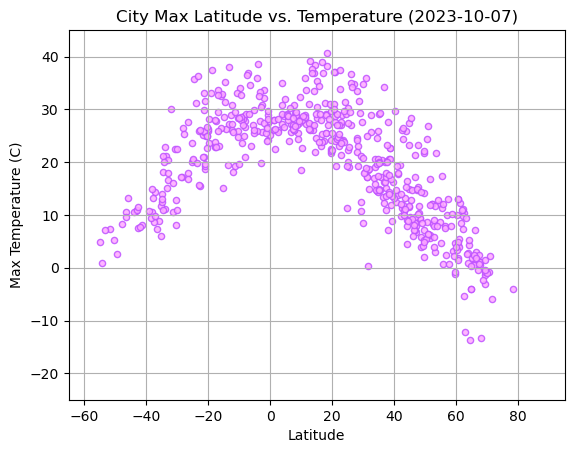

In [11]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', y='Max Temp', color='#ffaaff', alpha=0.85, edgecolor="#bf53ff", marker="o" )

# Incorporate the other graph properties
plt.grid()
plt.title('City Max Latitude vs. Temperature (2023-10-07)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.xlim(-65,95)
plt.ylim(-25,45)
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

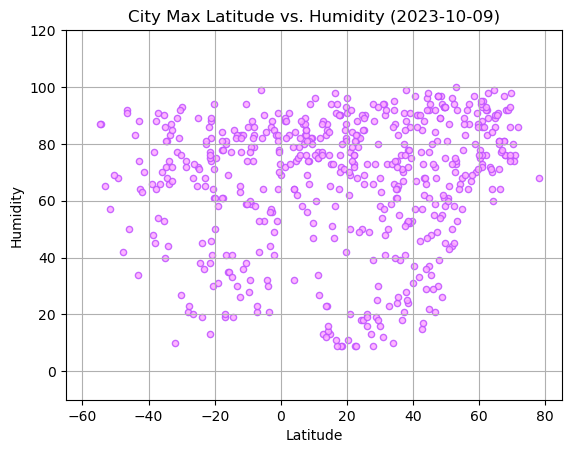

In [12]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure

city_data_df.plot.scatter(x='Lat', y='Humidity', color='#ffaaff', alpha=0.85, edgecolor="#bf53ff", marker="o" )

# Incorporate the other graph properties
plt.grid()
plt.title('City Max Latitude vs. Humidity (2023-10-09)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.xlim(-65,85)
plt.ylim(-10,120)
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()







#### Latitude Vs. Cloudiness

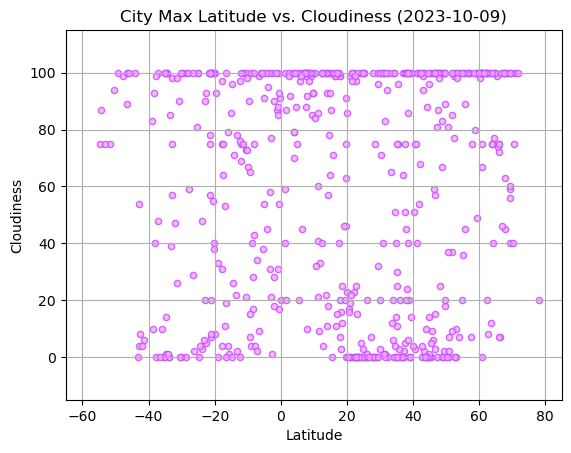

In [13]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
city_data_df.plot.scatter(x='Lat', y='Cloudiness', color='#ffaaff', alpha=0.85, edgecolor="#bf53ff", marker="o" )

# Incorporate the other graph properties
plt.grid()
plt.title('City Max Latitude vs. Cloudiness (2023-10-09)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.xlim(-65,85)
plt.ylim(-15,115)
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

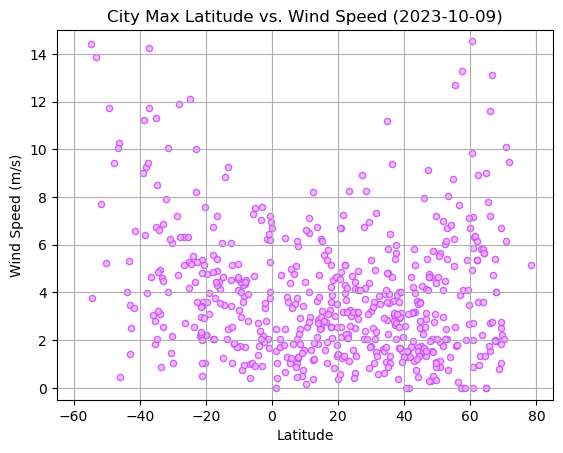

In [14]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
city_data_df.plot.scatter(x='Lat', y='Wind Speed', color='#ffaaff', alpha=0.85, edgecolor="#bf53ff", marker="o" )

# Incorporate the other graph properties
plt.grid()
plt.title('City Max Latitude vs. Wind Speed (2023-10-09)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.xlim(-65,85)
plt.ylim(-.5,15)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def lin_regression_plots(x_values, y_values, x_label, y_label, title, annot_xy):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
# insert the line equation  
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot the scatter plot and include the line
    print(f"The correlation between {x_label} and {y_label} is {round(st.pearsonr(x_values,y_values)[0],2)}")
    plt.scatter(x_values, y_values,color='#b28dff', edgecolor='#bf53ff')
    plt.plot(x_values, regress_values,"r-")
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.annotate(line_eq, xy= annot_xy, color = 'r')
    plt.show()
    


In [17]:
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']>=0)])
# # Display sample data
northern_hemi_df.head()

# city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,longyearbyen,78.2186,15.6401,-4.09,68,20,5.14,SJ,1697029313
4,lazaro cardenas,17.9583,-102.2000,25.60,90,99,2.56,MX,1697029569
5,olonkinbyen,70.9221,-8.7187,2.15,76,100,10.08,SJ,1697029570
7,enewetak,11.3474,162.3373,28.91,77,41,6.50,MH,1697029571
8,bac lieu,9.2850,105.7244,27.45,82,85,3.41,VN,1697029571


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']>=0)])
# # Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,longyearbyen,78.2186,15.6401,-4.09,68,20,5.14,SJ,1697029313
4,lazaro cardenas,17.9583,-102.2000,25.60,90,99,2.56,MX,1697029569
5,olonkinbyen,70.9221,-8.7187,2.15,76,100,10.08,SJ,1697029570
7,enewetak,11.3474,162.3373,28.91,77,41,6.50,MH,1697029571
8,bac lieu,9.2850,105.7244,27.45,82,85,3.41,VN,1697029571


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']<0)])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,oranjemund,-28.5500,16.4333,17.23,74,100,4.73,NaN,1697029565
1,sao francisco,-15.9486,-44.8644,32.47,35,4,4.42,BR,1697029567
3,port alfred,-33.5906,26.8910,21.21,83,85,0.89,ZA,1697029361
6,margaret river,-33.9500,115.0667,11.17,74,0,4.95,AU,1697029570
9,chonchi,-42.6128,-73.8092,7.56,64,8,2.50,CL,1697029572


###  Temperature vs. Latitude Linear Regression Plot

The correlation between Latitude and Temperature (C) is -0.84


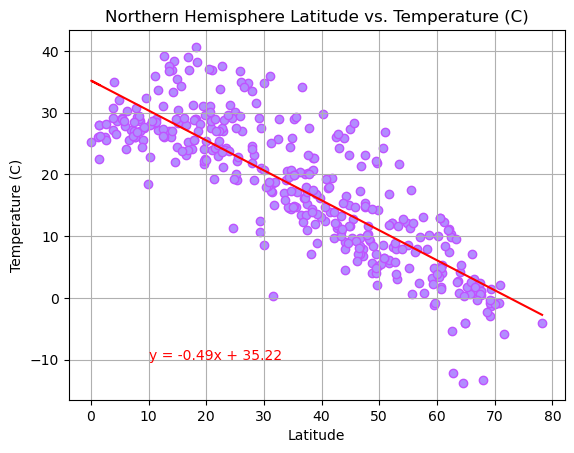

In [20]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

lin_regression_plots(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Latitude", "Temperature (C)", "Northern Hemisphere Latitude vs. Temperature (C)", (10, -10))





The correlation between Latitude and Temperature (C) is 0.79


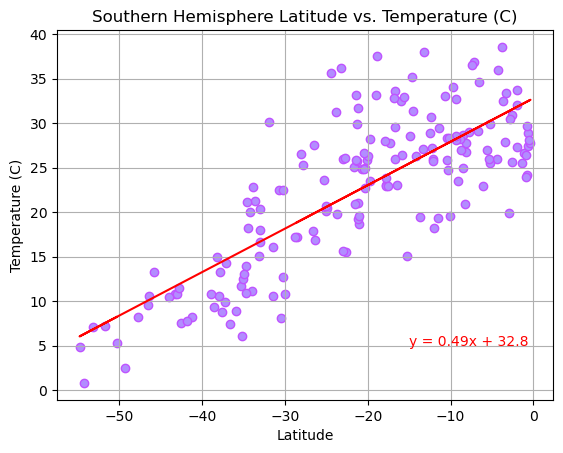

In [21]:
lin_regression_plots(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Latitude", "Temperature (C)", "Southern Hemisphere Latitude vs. Temperature (C)", (-15, 5))


**Discussion about the linear relationship:** 

There is a strong correlation between temperature and latitude. As latitude increases, temperature increases. 

### Humidity vs. Latitude Linear Regression Plot

The correlation between Latitude and Humidity is 0.16


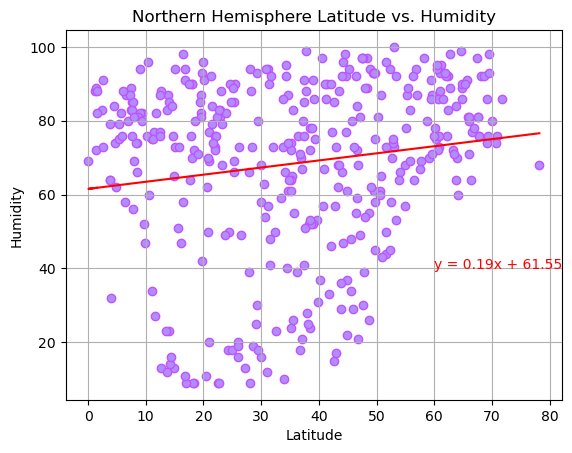

In [22]:
lin_regression_plots(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Latitude", "Humidity", "Northern Hemisphere Latitude vs. Humidity", (60,40))

 

The correlation between Latitude and Humidity is -0.08


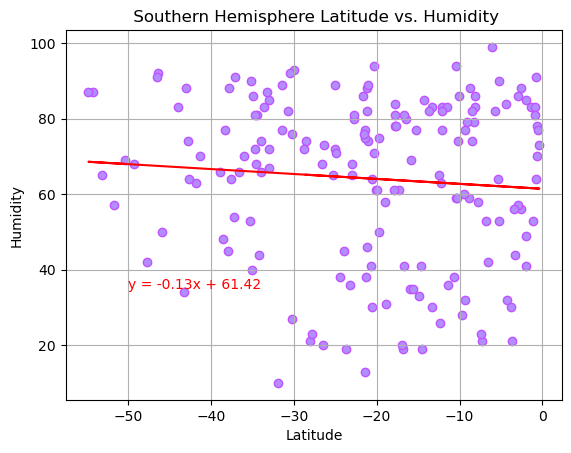

In [23]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE


lin_regression_plots(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Latitude", "Humidity", " Southern Hemisphere Latitude vs. Humidity", (-50, 35))


**Discussion about the linear relationship:** 

It does not appear that there is a strong correlation between latitude and humidity. As you can see on the graph, there is not a strong pattern. 

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between Latitude and Cloudiness is 0.04


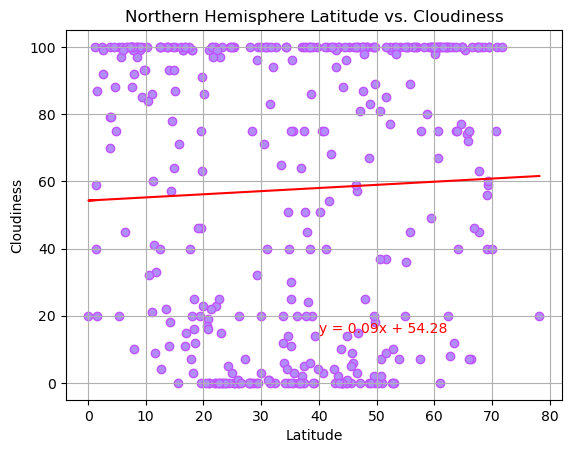

In [24]:
# Northern Hemisphere
# YOUR CODE HERE
lin_regression_plots(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Latitude", "Cloudiness", "Northern Hemisphere Latitude vs. Cloudiness", (40, 15))

The correlation between Latitude and Cloudiness is 0.02


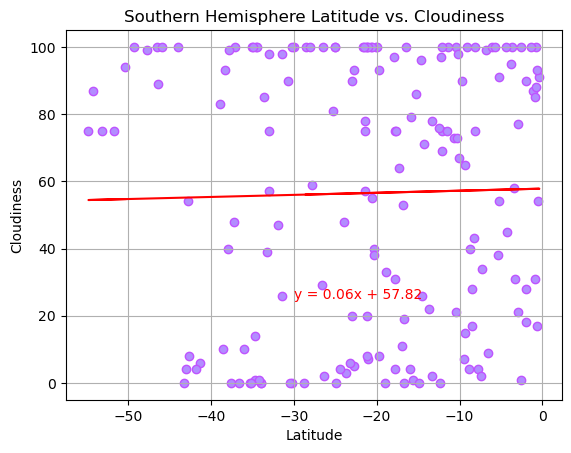

In [25]:
# Southern Hemisphere
lin_regression_plots(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Latitude", "Cloudiness", "Southern Hemisphere Latitude vs. Cloudiness", (-30, 25))

**Discussion about the linear relationship:** there does not appear to be a strong correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between Latitude and Wind Speed is 0.2


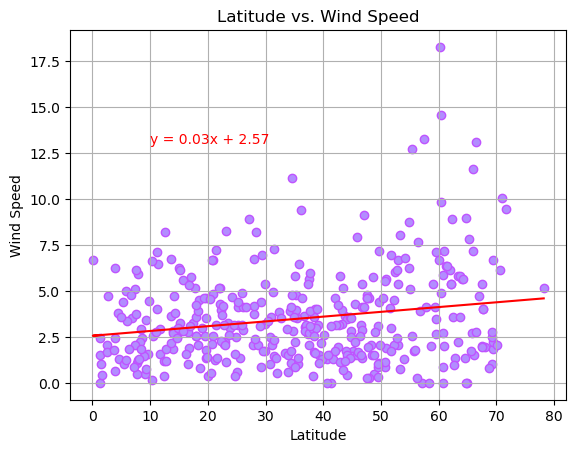

In [26]:
# Northern Hemisphere
# YOUR CODE HERE
lin_regression_plots(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Latitude", "Wind Speed", "Latitude vs. Wind Speed", (10,13))

The correlation between Latitude and Wind Speed is -0.39


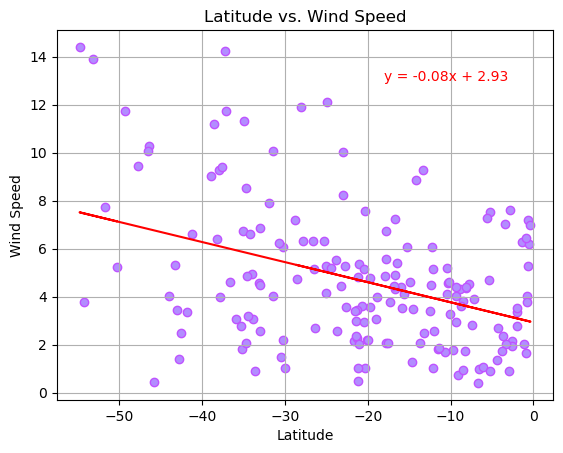

In [29]:
# Southern Hemisphere
lin_regression_plots(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Latitude", "Wind Speed", "Latitude vs. Wind Speed", (-18,13))

**Discussion about the linear relationship:** generally, as latitude increases, wind speed increases